In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("churn_cleaned.csv")

In [3]:
X = df.drop('Churn', axis=1)

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
inertia = []

for k in range(2, 9):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

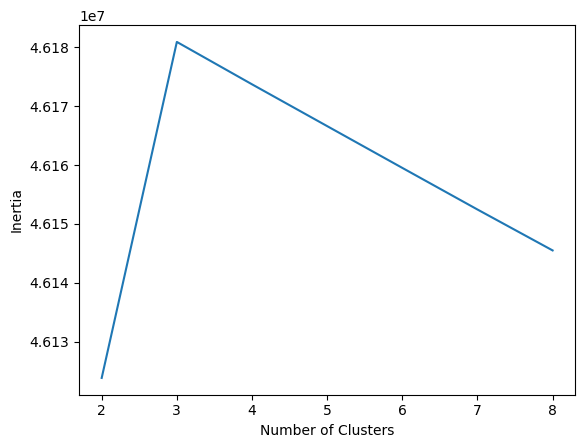

In [6]:
plt.plot(range(2, 9), inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [7]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['segment'] = kmeans.fit_predict(X_scaled)

In [8]:
segment_summary = df.groupby('segment').mean()
segment_summary

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
segment,,,,,,,,,,,,,,,,,,,,,
0,0.000000,36.000000,40.650000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.000000,14.000000,75.100000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.162143,32.391076,64.789122,0.265312,0.504618,0.483018,0.299559,0.903226,0.096774,0.422055,...,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142
3,0.000000,1.000000,19.950000,0.500000,0.750000,0.250000,0.250000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
df.groupby('segment')['Churn'].mean()

segment
0    0.000000
1    0.000000
2    0.265312
3    0.500000
Name: Churn, dtype: float64

In [10]:
df['segment'].value_counts()

segment
2    7037
3       4
0       1
1       1
Name: count, dtype: int64

In [11]:
df.groupby('segment')['MonthlyCharges'].mean()

segment
0    40.650000
1    75.100000
2    64.789122
3    19.950000
Name: MonthlyCharges, dtype: float64

In [12]:
df.to_csv("churn_segmented.csv", index=False)